# Random Forest Classifier

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the datasets

datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

In [3]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


C:\Users\rishab\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [5]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [6]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)

In [7]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

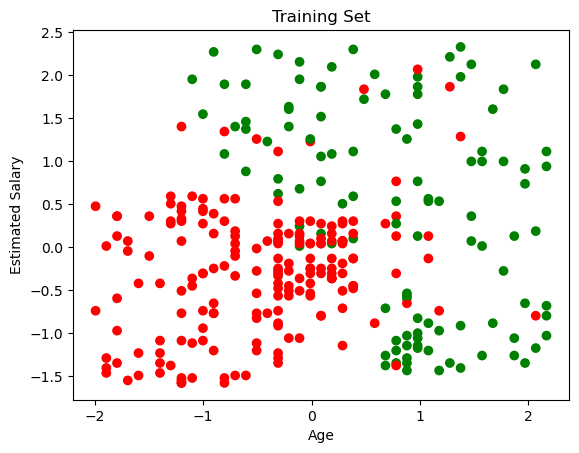

In [8]:
from matplotlib.colors import ListedColormap

# Plotting the scatter plot for the training set
plt.scatter(X_Train[:, 0], X_Train[:, 1], c=Y_Train, cmap=ListedColormap(('red', 'green')))
plt.title('Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

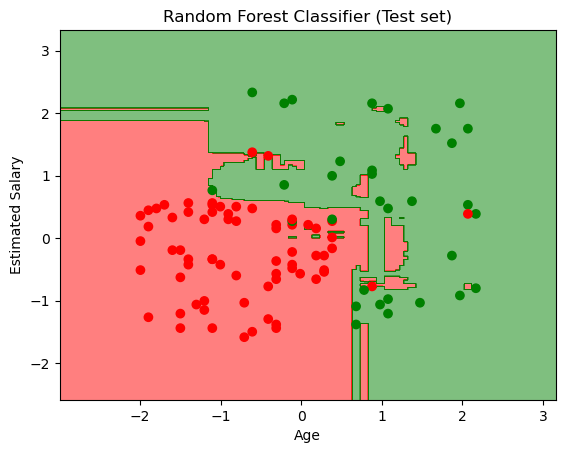

In [9]:
# Create meshgrid for plotting decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_Test[:, 0].min() - 1, stop=X_Test[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_Test[:, 1].min() - 1, stop=X_Test[:, 1].max() + 1, step=0.01))

# Plot filled regions using colors for the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5, cmap=ListedColormap(('red', 'green')))

# Plot test set points
plt.scatter(X_Test[:, 0], X_Test[:, 1], c=Y_Test, cmap=ListedColormap(('red', 'green')))

# Set plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Set plot title and labels
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Show plot
plt.show()